In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database (or create one if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# # Load data into a DataFrame
# sales_data = pd.read_csv("sales_data.csv")
# sales_data.to_sql("sales_data", conn, if_exists="replace", index=False)




Matplotlib is building the font cache; this may take a moment.


         category  total_sales
0     Electronics      2924133
1  Home & Kitchen       432470
2        Clothing       337530
3            Toys       187390
4           Books        87055


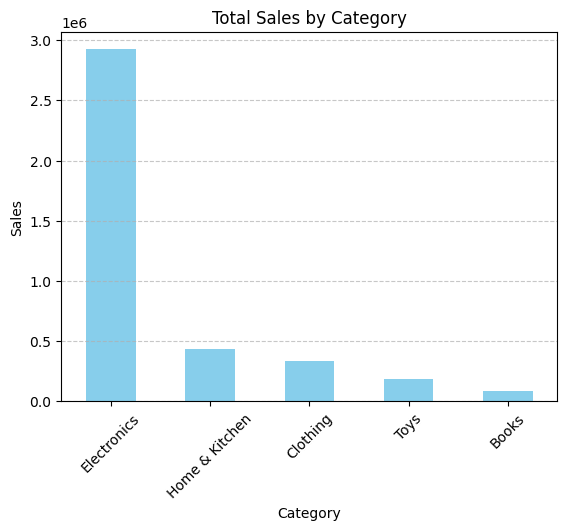

This visualization shows the total sales generated by each product category. The highest performing categories can be identified for strategic business decisions.


In [2]:
# Query 1: Total Sales by Category
query1 = """
SELECT category, SUM(sales) AS total_sales
FROM data
GROUP BY category
ORDER BY total_sales DESC;
"""
df1 = pd.read_sql(query1, conn)
print(df1)

df1.plot(kind='bar', x='category', y='total_sales', legend=False, color='skyblue')
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Explanation
print("This visualization shows the total sales generated by each product category. The highest performing categories can be identified for strategic business decisions.")



      month  total_sales
0   2023-02       126114
1   2023-03       152645
2   2023-04       193902
3   2023-05       164303
4   2023-06       161636
5   2023-07       155204
6   2023-08       174388
7   2023-09       147310
8   2023-10       186361
9   2023-11       181630
10  2023-12       144954
11  2024-01       159909
12  2024-02       167547
13  2024-03       179493
14  2024-04       149148
15  2024-05       147233
16  2024-06       186109
17  2024-07       159106
18  2024-08       168835
19  2024-09       161751
20  2024-10       178246
21  2024-11       172033
22  2024-12       175949
23  2025-01       165021
24  2025-02         9751


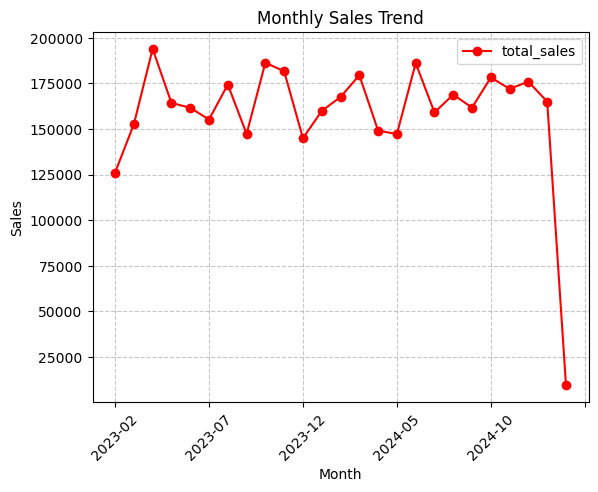

The trend analysis of monthly sales helps to identify seasonal variations and peak revenue periods, which can assist in forecasting and inventory management.


In [3]:
# Query 2: Monthly Sales Trend
query2 = """
SELECT strftime('%Y-%m', order_date) AS month, SUM(sales) AS total_sales
FROM data
GROUP BY month
ORDER BY month;
"""
df2 = pd.read_sql(query2, conn)
print(df2)

df2.plot(kind='line', x='month', y='total_sales', marker='o', color='red', linestyle='-')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Explanation
print("The trend analysis of monthly sales helps to identify seasonal variations and peak revenue periods, which can assist in forecasting and inventory management.")

  customer_id  total_spent
0        2353        12834
1        4579        11437
2        1505        10731
3        3432        10050
4        2891         9509


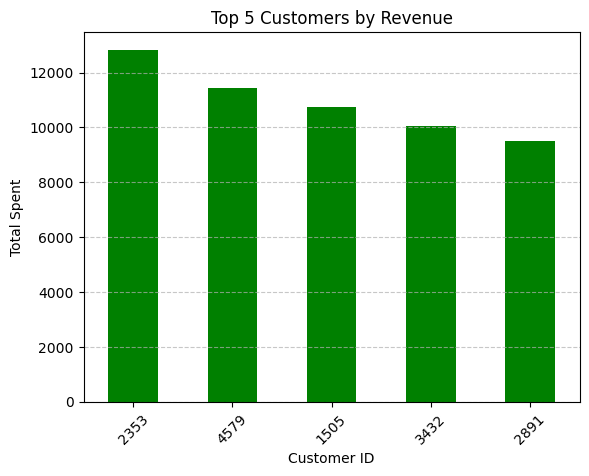

Identifying the top revenue-generating customers allows for targeted marketing campaigns and customer retention strategies.


In [4]:
# Query 3: Top 5 Customers by Revenue
query3 = """
SELECT customer_id, SUM(sales) AS total_spent
FROM data
GROUP BY customer_id
ORDER BY total_spent DESC
LIMIT 5;
"""
df3 = pd.read_sql(query3, conn)
print(df3)

df3.plot(kind='bar', x='customer_id', y='total_spent', legend=False, color='green')
plt.title("Top 5 Customers by Revenue")
plt.ylabel("Total Spent")
plt.xlabel("Customer ID")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Explanation
print("Identifying the top revenue-generating customers allows for targeted marketing campaigns and customer retention strategies.")

In [5]:
# Query 4: Average Order Value (AOV) Per Customer
query4 = """
SELECT customer_id, AVG(sales) AS average_order_value
FROM data
GROUP BY customer_id
ORDER BY average_order_value DESC;
"""
df4 = pd.read_sql(query4, conn)
print(df4)

# Explanation
print("The average order value metric helps in understanding customer purchasing behavior and setting pricing strategies accordingly.")

     customer_id  average_order_value
0           4873               4800.0
1           4798               4800.0
2           3657               4800.0
3           3603               4800.0
4           3554               4800.0
...          ...                  ...
3678        2166                 10.0
3679        1698                 10.0
3680        1387                 10.0
3681        1363                 10.0
3682        1340                 10.0

[3683 rows x 2 columns]
The average order value metric helps in understanding customer purchasing behavior and setting pricing strategies accordingly.


     customer_id  purchase_count
0           3580              11
1           3636              10
2           4223               9
3           3886               9
4           1341               9
...          ...             ...
3678        1008               1
3679        1006               1
3680        1004               1
3681        1003               1
3682        1001               1

[3683 rows x 2 columns]


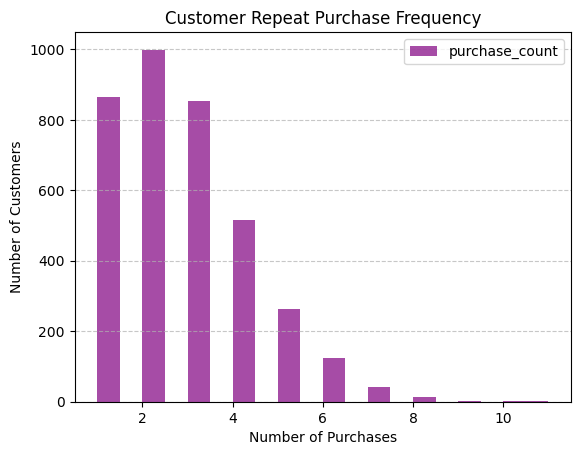

This histogram illustrates the frequency of repeat purchases, providing insights into customer retention rates and engagement.


In [6]:
# Query 5: Repeat Purchase Frequency
query5 = """
SELECT customer_id, COUNT(order_id) AS purchase_count
FROM data
GROUP BY customer_id
ORDER BY purchase_count DESC;
"""
df5 = pd.read_sql(query5, conn)
print(df5)

df5.plot(kind='hist', bins=20, color='purple', alpha=0.7)
plt.title("Customer Repeat Purchase Frequency")
plt.ylabel("Number of Customers")
plt.xlabel("Number of Purchases")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Explanation
print("This histogram illustrates the frequency of repeat purchases, providing insights into customer retention rates and engagement.")

         category  profit_margin
0     Electronics      1169653.2
1  Home & Kitchen       172988.0
2        Clothing       135012.0
3            Toys        74956.0
4           Books        34822.0


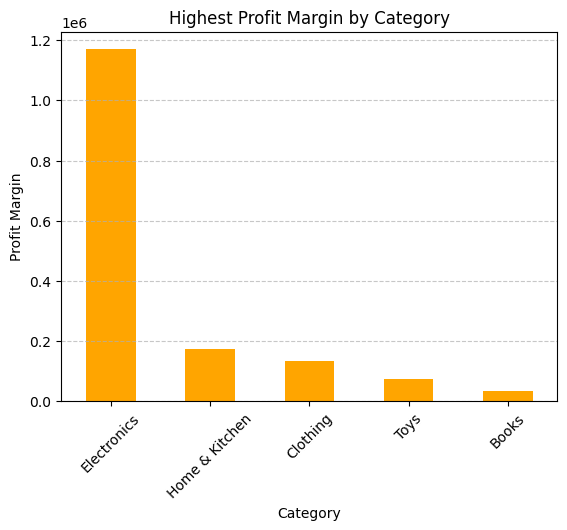

This visualization highlights which product categories generate the highest profit margins, helping businesses focus on high-margin products.


In [7]:
# Query 6: Highest Profit Margin Categories
query6 = """
SELECT category, SUM(sales - (quantity * price * 0.6)) AS profit_margin
FROM data
GROUP BY category
ORDER BY profit_margin DESC;
"""
df6 = pd.read_sql(query6, conn)
print(df6)

df6.plot(kind='bar', x='category', y='profit_margin', legend=False, color='orange')
plt.title("Highest Profit Margin by Category")
plt.ylabel("Profit Margin")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Explanation
print("This visualization highlights which product categories generate the highest profit margins, helping businesses focus on high-margin products.")

In [8]:
# Close the database connection
conn.close()